In [1]:
import lightkurve as lk
import astropy.units as u

datalist = lk.search_lightcurvefile('16CygA',cadence='short')
data = datalist[3:4].download_all()
lc = data[0].PDCSAP_FLUX.normalize().flatten()
for nlc in data:
    lc = lc.append(nlc.PDCSAP_FLUX.normalize().flatten())
lc = lc.remove_nans()
pg = lc.to_periodogram(normalization='psd')
snr = pg.flatten()

numax, ax = snr.estimate_numax(show_plots=True)
print('Our value for numax is: {:.2f}'.format(numax))
dnu, ax = snr.estimate_dnu(show_plots=True)
print('Our value for dnu is: {:.2f}'.format(dnu))

Our value for numax is: 2190.08 uHz
Our value for dnu is: 103.41 uHz


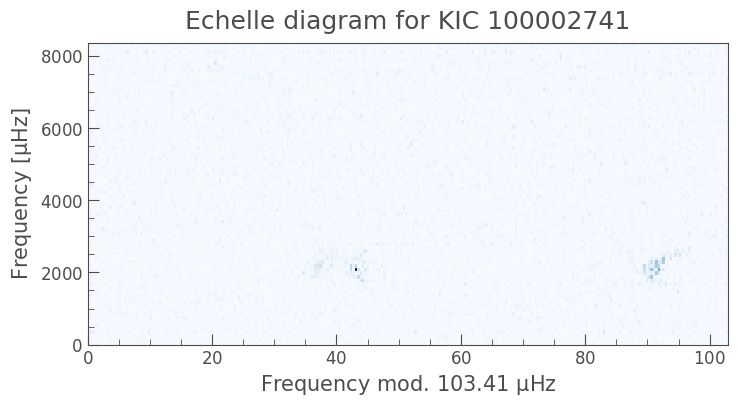

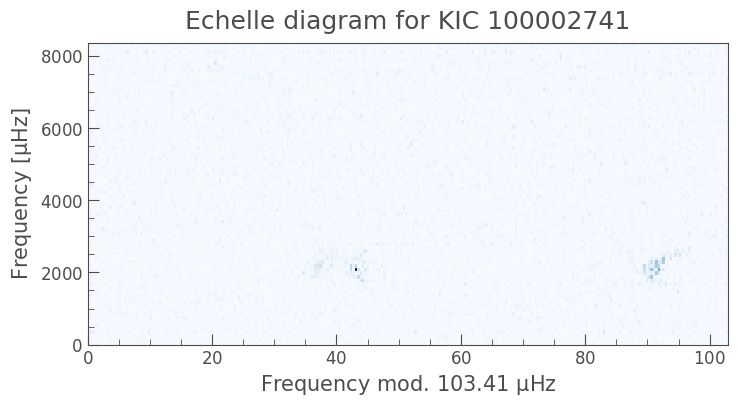

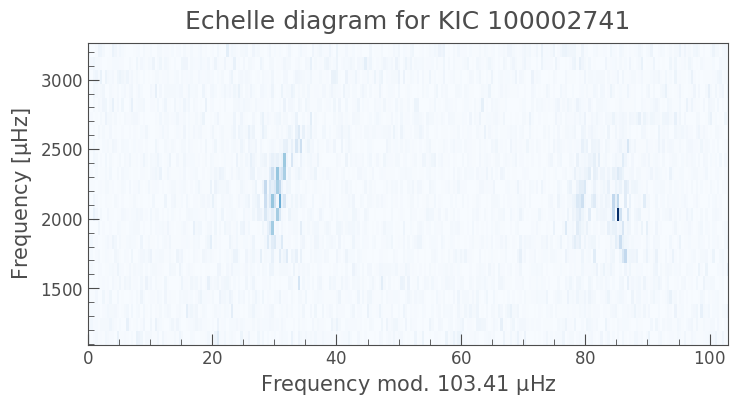

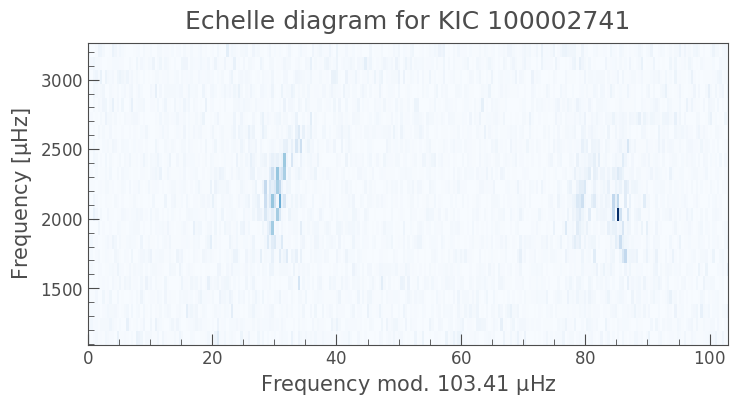

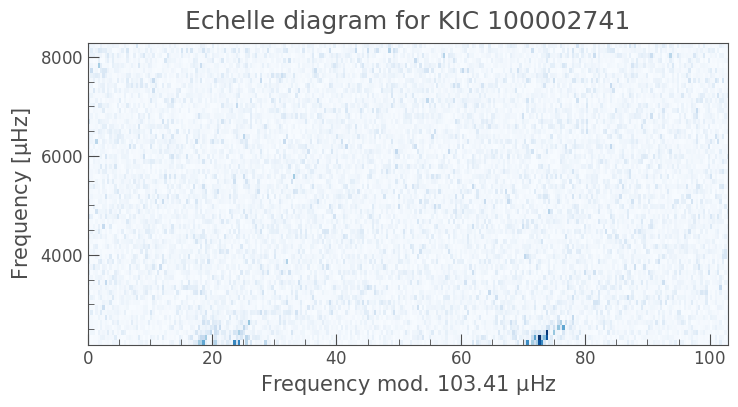

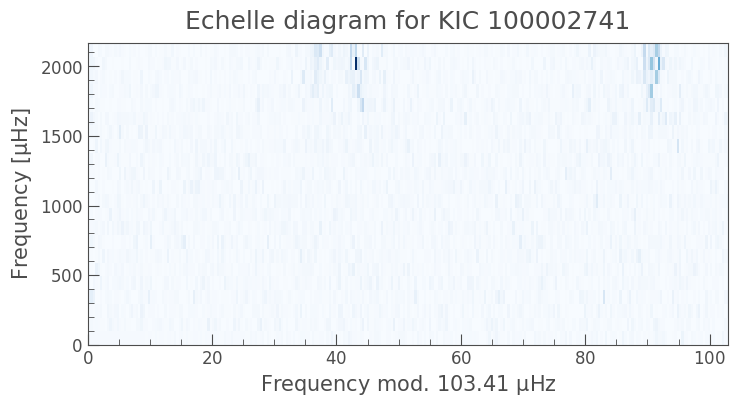

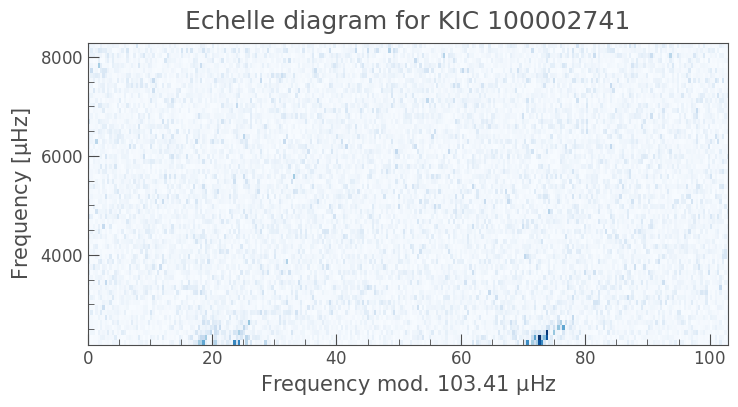

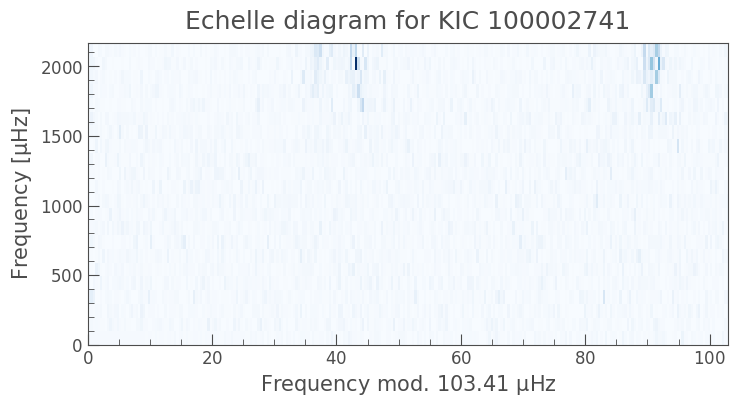

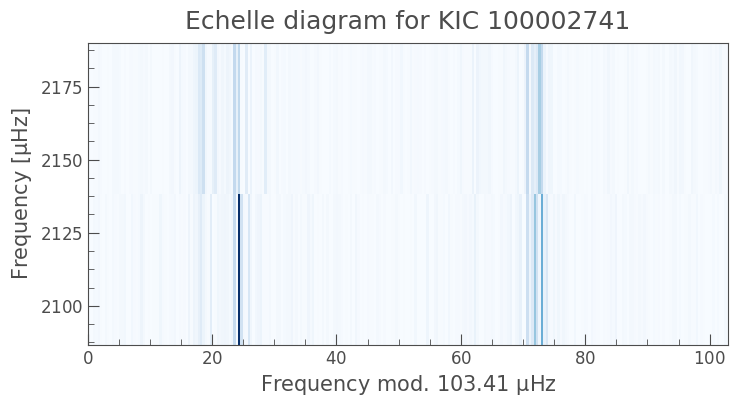

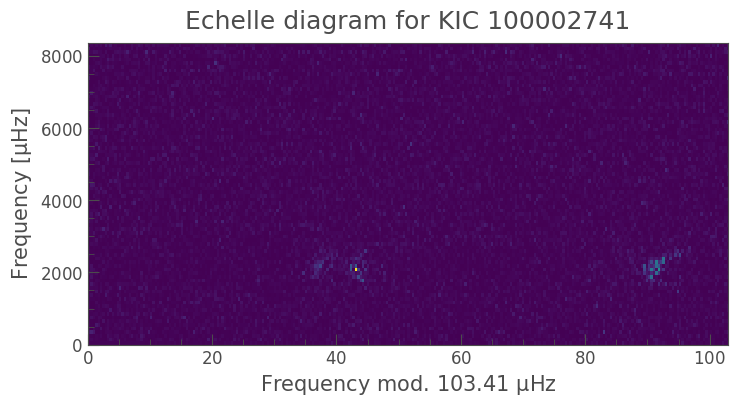

In [2]:
#Assert basic echelle works
snr.plot_echelle(dnu)
snr.plot_echelle(u.Quantity(dnu, 1/u.day))

#Assert echelle works with numax
snr.plot_echelle(dnu, numax)
snr.plot_echelle(dnu, u.Quantity(numax, 1/u.day))

#Assert echelle works with minimum limit
snr.plot_echelle(dnu, minimum_frequency = numax)
snr.plot_echelle(dnu, maximum_frequency = numax)
snr.plot_echelle(dnu, minimum_frequency = u.Quantity(numax, 1/u.day))
snr.plot_echelle(dnu, maximum_frequency = u.Quantity(numax, 1/u.day))
snr.plot_echelle(dnu, minimum_frequency = u.Quantity(numax-dnu, 1/u.day),
                    maximum_frequency = numax+dnu)

#Assert can pass colourmap
snr.plot_echelle(dnu, cmap='viridis')